In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 2. Loading the Data
df = pd.read_csv("titanic.csv")
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


In [3]:
# 3. Exploring the Data
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      891 non-null    object 
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
 4   Survived  891 non-null    int64  
 5   Family    891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


Name          0
Sex           0
Age         177
Pclass        0
Survived      0
Family        0
Fare          0
Embarked      2
dtype: int64

In [4]:
# 4. Data Cleaning
# Fill missing Age with median, Embarked with mode, drop Name
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop(columns=["Name"], inplace=True)

C:\Users\38160\AppData\Local\Temp\ipykernel_9656\1050546079.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\38160\AppData\Local\Temp\ipykernel_9656\1050546079.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# 5. Encoding Categorical Variables
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])        # male=1, female=0
df["Embarked"] = le.fit_transform(df["Embarked"])

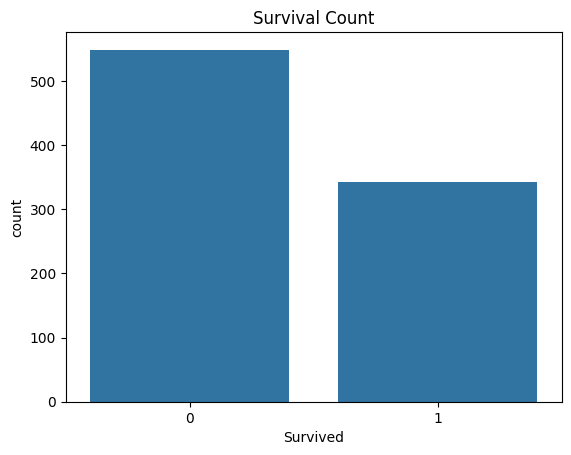

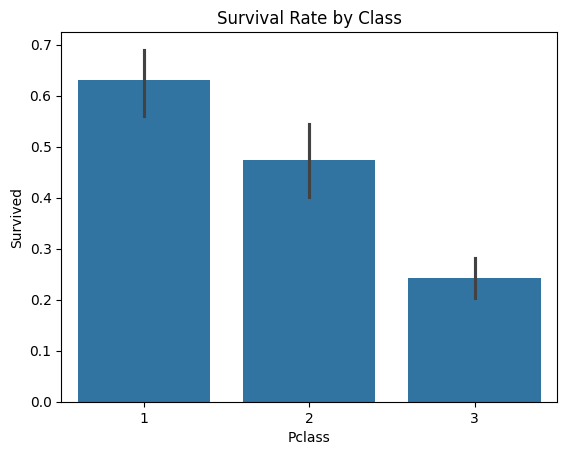

In [6]:
# 6. Exploratory Data Analysis (optional graphs)
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Class")
plt.show()

In [7]:
# 7. Features and Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [8]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 9. Model Training - Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [10]:
# 10. Model Training - Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [11]:
# 11. Evaluation - Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7988826815642458
[[86 21]
 [15 57]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       107
           1       0.73      0.79      0.76        72

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



In [12]:
# 12. Evaluation - Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8156424581005587
[[89 18]
 [15 57]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       107
           1       0.76      0.79      0.78        72

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

